In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:

# Load the dataset with the correct encoding
df = pd.read_csv('datasets\\Global_terrorist.csv', encoding='ISO-8859-1')


In [3]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

<h1> Filtering Data </h1>

In [4]:
filter1 = df[df['region_txt'] == 'Middle East & North Africa'] #50k

In [5]:
filter2 = filter1[filter1['attacktype1_txt'] == 'Bombing/Explosion'] #30k

In [6]:
filter3 = filter2[filter2['nkill'] >= 10] #1,800

In [7]:
filter4 = filter3[filter3['iyear'] >= 2000] #1737

<h1> Data Aggregation </h1>

In [8]:
ME_terror = filter4.groupby(['longitude','latitude']).size().reset_index(name = 'incident_count')

<h1> Visualization of GeoSpatial using FOLIUM </h1>

<h1>Regional Analysis </h1>

In [9]:
import folium 
from folium.plugins import HeatMap

In [10]:
heat_df = ME_terror[['latitude','longitude', 'incident_count']].values.tolist()

In [11]:
my_map = folium.Map(location = [30,40], zoom_start = 4)

In [12]:
HeatMap(heat_df).add_to(my_map)

In [13]:
my_map

In [43]:
my_map.save('terrorim_middleeast.html')

<h1>Are attacks increasing or decreasing over time?</h1>

In [15]:
attacks_per_year = df['iyear'].value_counts().sort_index()

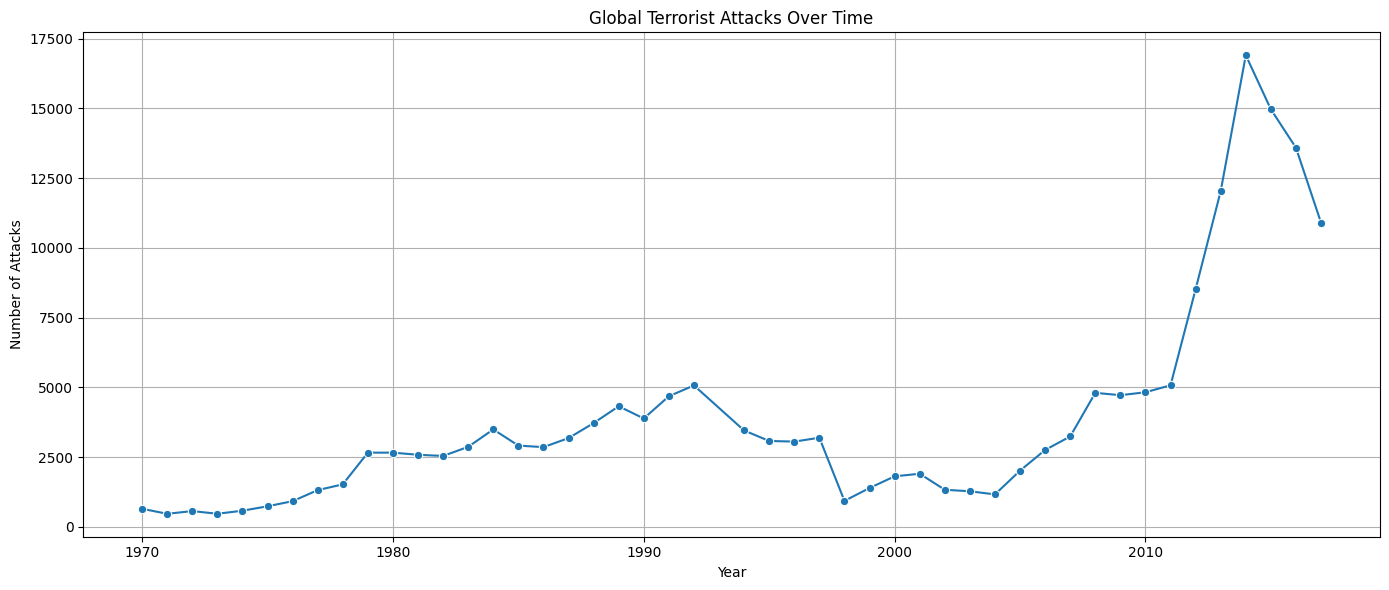

iyear
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: count, dtype: int64

In [19]:
plt.figure(figsize=(14, 6))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values, marker='o')
plt.title('Global Terrorist Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.tight_layout()
plt.show()
attacks_per_year.tail(10)  

<h1>Seasonal trends: Are some months more prone to attacks?</h1>

In [23]:
df['imonth'] = pd.to_numeric(df['imonth'], errors='coerce')  # convert to numeric
monthly_counts = df['imonth'].value_counts().sort_index()

In [24]:
month_labels = ['Unknown', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

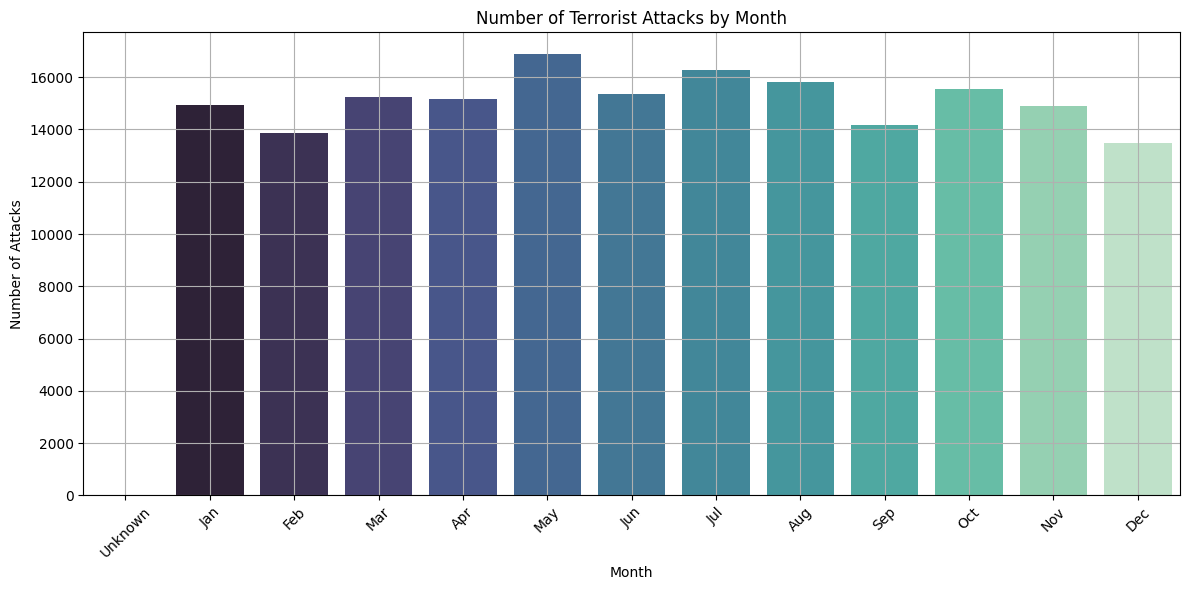

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index.astype(int), y=monthly_counts.values, palette='mako')
plt.xticks(ticks=range(0, 13), labels=month_labels, rotation=45)
plt.title('Number of Terrorist Attacks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.grid(True)
plt.show()

<h1>Are certain weapons more lethal?</h1>

In [26]:
weapon_lethality = df.groupby('weaptype1_txt')['nkill'].mean().sort_values(ascending=False)


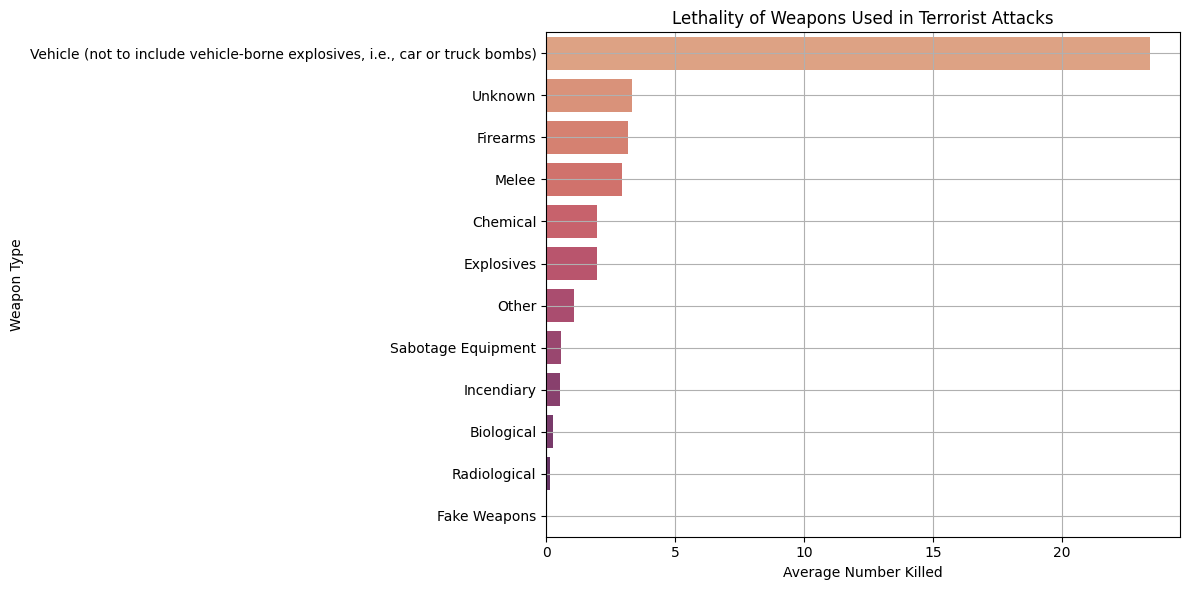

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x=weapon_lethality.values, y=weapon_lethality.index, palette='flare')
plt.xlabel('Average Number Killed')
plt.ylabel('Weapon Type')
plt.title('Lethality of Weapons Used in Terrorist Attacks')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>Who are the most common victims?</h1>

In [28]:
target_counts = df['targtype1_txt'].value_counts()

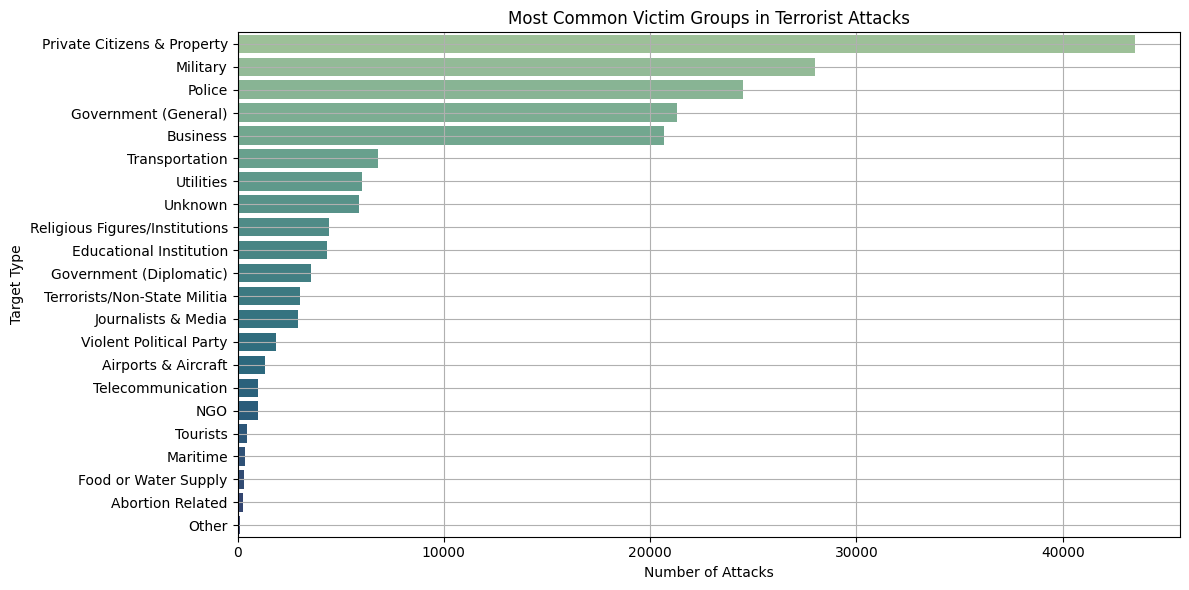

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x=target_counts.values, y=target_counts.index, palette='crest')
plt.xlabel('Number of Attacks')
plt.ylabel('Target Type')
plt.title('Most Common Victim Groups in Terrorist Attacks')
plt.tight_layout()
plt.grid(True)
plt.show()

<h1>Which groups are most responsible for high-casualty events?</h1>

In [30]:
filtered_df = df[df['gname'] != 'Unknown']

In [31]:
group_kills = filtered_df.groupby('gname')['nkill'].sum().sort_values(ascending=False).head(10)


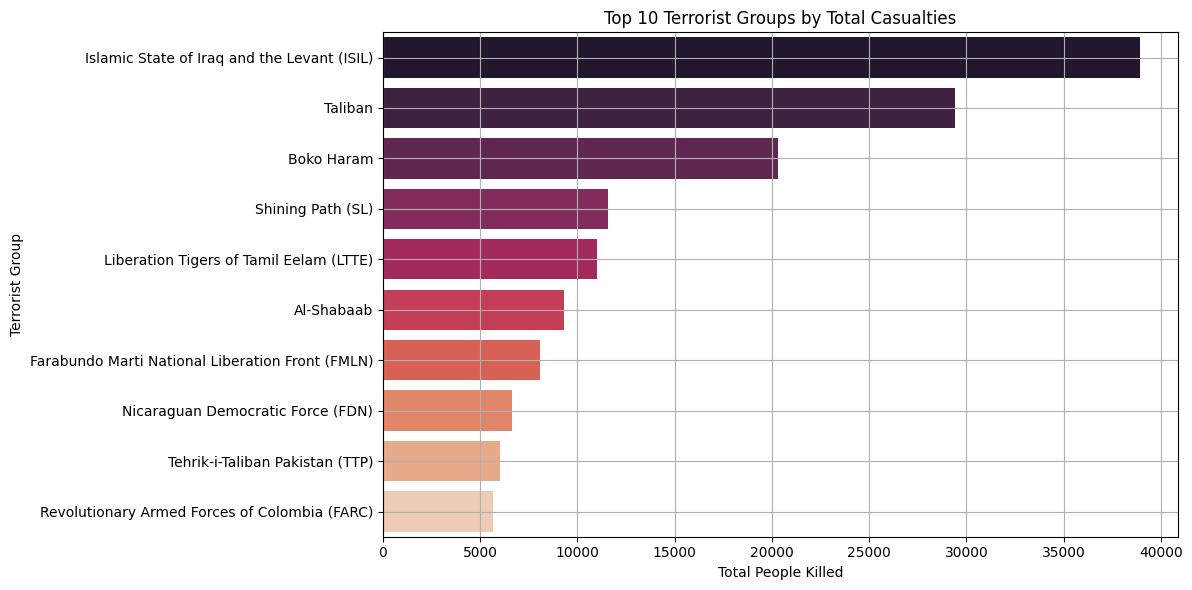

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x=group_kills.values, y=group_kills.index, palette='rocket')
plt.xlabel('Total People Killed')
plt.ylabel('Terrorist Group')
plt.title('Top 10 Terrorist Groups by Total Casualties')
plt.tight_layout()
plt.grid(True)
plt.show()

<h1>Which attack types cause the most deaths or injuries?</h1>

In [33]:
attack_stats = df.groupby('attacktype1_txt')[['nkill', 'nwound']].sum().sort_values(by='nkill', ascending=False)


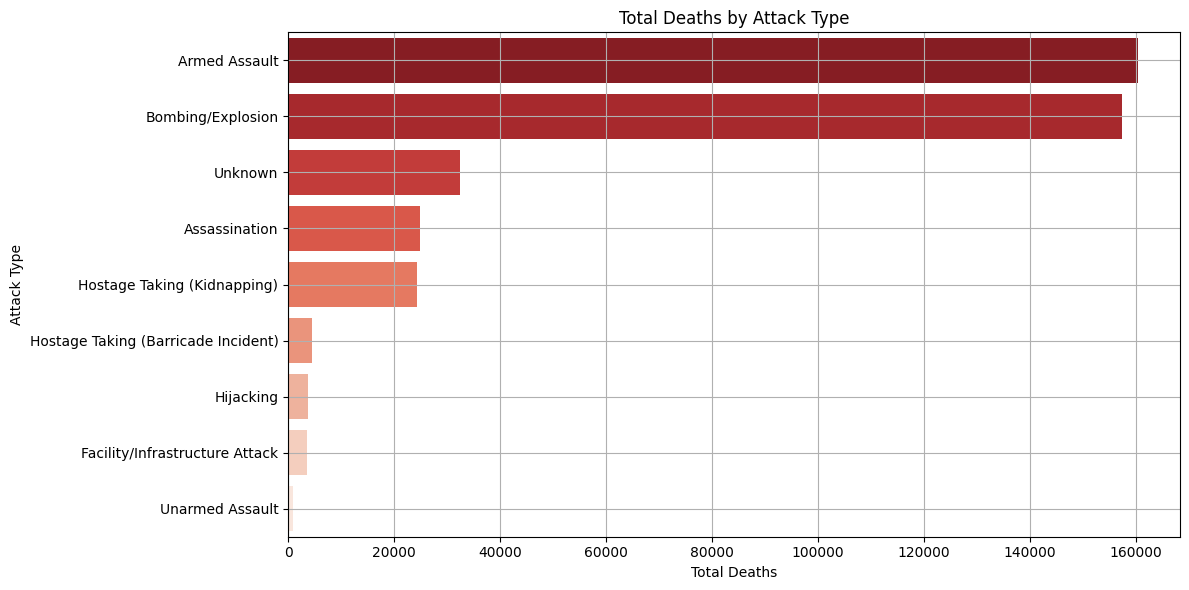

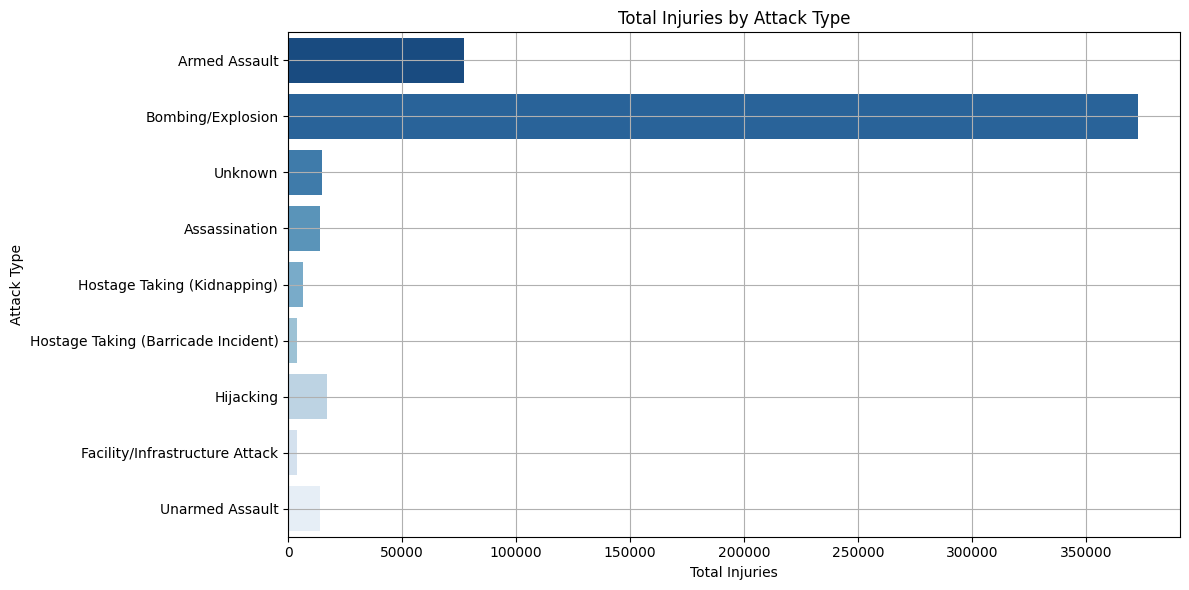

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_stats['nkill'].values, y=attack_stats.index, palette='Reds_r')
plt.xlabel('Total Deaths')
plt.ylabel('Attack Type')
plt.title('Total Deaths by Attack Type')
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=attack_stats['nwound'].values, y=attack_stats.index, palette='Blues_r')
plt.xlabel('Total Injuries')
plt.ylabel('Attack Type')
plt.title('Total Injuries by Attack Type')
plt.tight_layout()
plt.grid(True)
plt.show()

<h1>How do they compare in terms of casualties?</h1>

In [37]:
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)

In [38]:
df['casualties'] = df['nkill'] + df['nwound']

In [39]:
casualty_stats = df.groupby('attacktype1_txt')['casualties'].sum().sort_values(ascending=False)


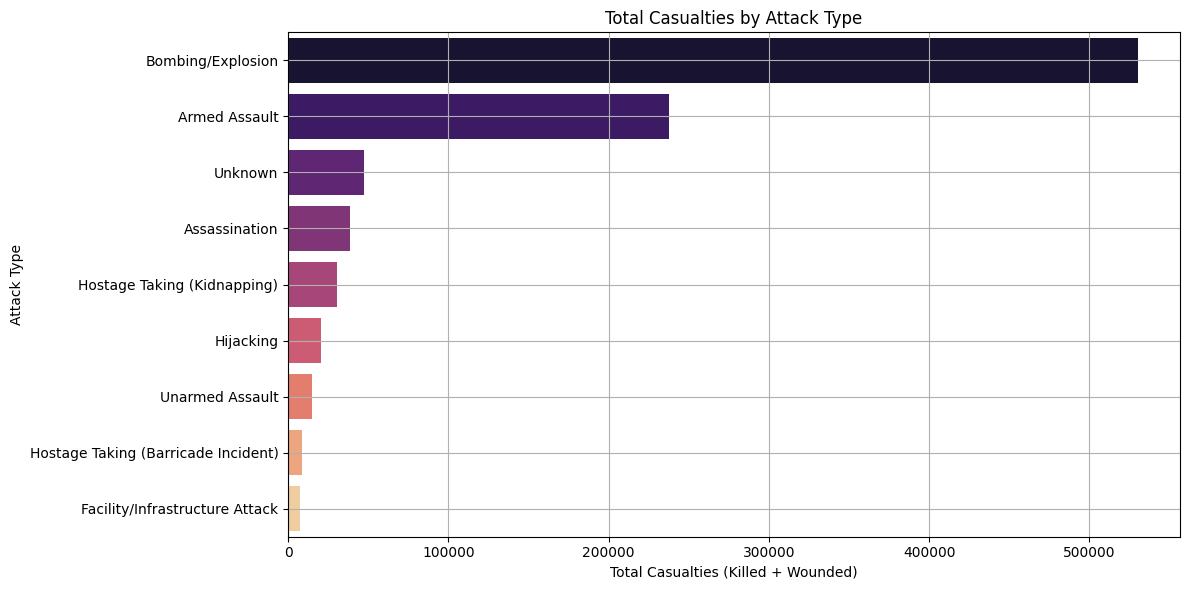

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x=casualty_stats.values, y=casualty_stats.index, palette='magma')
plt.xlabel('Total Casualties (Killed + Wounded)')
plt.ylabel('Attack Type')
plt.title('Total Casualties by Attack Type')
plt.tight_layout()
plt.grid(True)
plt.show()